In [117]:
# Import statements
import numpy as numpy
import pandas as pd
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
import random

In [118]:
# Define datasets for individual inhibitory checkpoints
data = pd.read_csv('data/ab_ag.tsv', sep='\t')
pd1 = data[data['compound'].str.contains('PD-1', na=False)]
pdl1 = data[data['compound'].str.contains('PD-L1', na=False)]
ctla4 = data[data['compound'].str.contains('CTLA-4', na=False)]
kir = data[data['compound'].str.contains('KIR', na=False)]
lag3 = data[data['compound'].str.contains('LAG', na=False)]
tim3 = data[data['compound'].str.contains('TIM3', na=False)]

In [119]:
# Filter out necessary columns
pd1 = pd1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
pdl1 = pdl1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
ctla4 = ctla4[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
kir = kir[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
lag3 = lag3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
tim3 = tim3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]

In [173]:
combined_dataset = [pdl1, pd1, ctla4, kir, lag3, tim3]

# Shuffle the list randomly
random.shuffle(combined_dataset)

# Concatenate them in the new random order
merged_df = pd.concat(combined_dataset, ignore_index=True)
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

In [183]:
shuffled_df = shuffled_df[shuffled_df['resolution'] < 3.5]
shuffled_df = shuffled_df.dropna()

In [50]:
resolutions = shuffled_df['resolution']

<ipython-input-52-e3290d2f22b3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=resolutions, palette='pastel')


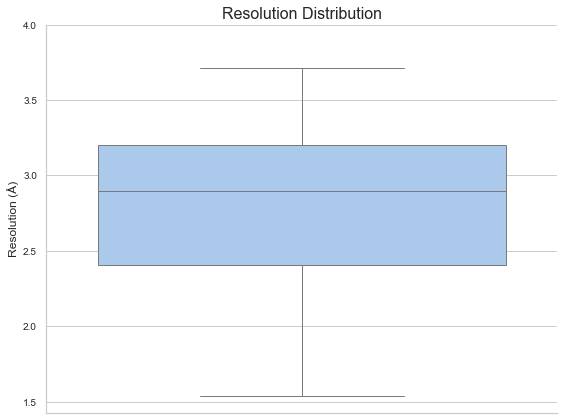

In [ ]:
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(data=resolutions, palette='pastel')
plt.ylim(top=4.0)

# Add title and labels
plt.title('Resolution Distribution', fontsize=16)
plt.ylabel('Resolution (Å)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional: remove top and right spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.savefig('plots/resolution_distribution_before_cleanup.pdf', bbox_inches='tight')
# plt.show()

In [ ]:
data[data['compound'].str.contains('TIM3', na=False)]

In [163]:
l = ['CTLA-4', 'TIM3', 'PD-1', 'PD-L1', 'KIR', 'LAG3']

new_df = pd.DataFrame(index = l)

for item in l:
    count = shuffled_df[shuffled_df['compound'].str.contains(item, na=False)].shape[0]
    new_df.loc[item, 'count'] = count

new_df = new_df.reset_index()
new_df.columns = ['checkpoint', 'count'] 

<ipython-input-164-8b906ac0e3c8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df, x='checkpoint', y='count', palette='Set2')


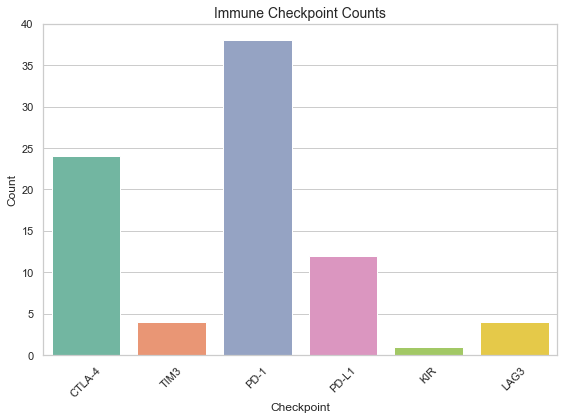

In [164]:
 # rename for clarity

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=new_df, x='checkpoint', y='count', palette='Set2')

# Styling
plt.title('Immune Checkpoint Counts', fontsize=14)
plt.xlabel('Checkpoint', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(top=40)
plt.tight_layout()
plt.savefig('plots/immune_checkpoint_counts_before_cleanup.pdf', bbox_inches='tight')
plt.show()

In [167]:
shuffled_df

,pdb,Hchain,Lchain,antigen_chain,antigen_type,antigen_name,compound,resolution,method
0,5jxe,D,C,B,protein,programmed cell death protein 1,Human PD-1 ectodomain complexed with Pembroliz...,2.900,X-RAY DIFFRACTION
1,7cgw,A,B,C,protein,programmed cell death protein 1,Complex structure of PD-1 and tislelizumab Fab,3.200,X-RAY DIFFRACTION
3,5x8l,G,L,B,protein,programmed cell death 1 ligand 1,PD-L1 in complex with atezolizumab,3.100,X-RAY DIFFRACTION
4,6xy2,H,L,A,protein,cytotoxic t-lymphocyte protein 4,Crystal structure of CTLA-4 complexed with the...,3.050,X-RAY DIFFRACTION
5,8gy5,H,L,P,protein,programmed cell death protein 1,High-resolution structure of the cemiplimab Fa...,1.980,X-RAY DIFFRACTION
...,...,...,...,...,...,...,...,...,...
76,5wt9,H,L,G,protein,programmed cell death protein 1,Complex structure of PD-1 and nivolumab-Fab,2.401,X-RAY DIFFRACTION
77,7cgw,H,L,P,protein,programmed cell death protein 1,Complex structure of PD-1 and tislelizumab Fab,3.200,X-RAY DIFFRACTION
79,7su0,H,L,C,protein,cytotoxic t-lymphocyte protein 4,Crystal structure of an acidic pH-selective Ip...,2.410,X-RAY DIFFRACTION
81,8u31,C,B,A,protein,programmed cell death protein 1,Crystal structure of PD-1 in complex with a Fab,2.730,X-RAY DIFFRACTION


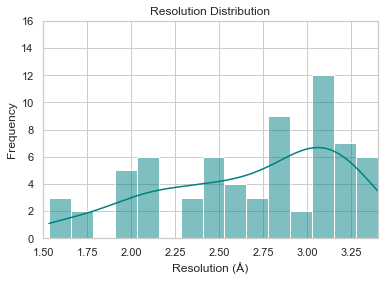

In [187]:
sns.histplot(shuffled_df['resolution'], bins=15, kde=True, color='teal')
plt.title('Resolution Distribution')
plt.xlabel('Resolution (Å)')
plt.ylabel('Frequency')
plt.ylim(top = 16)
plt.xlim(left = 1.5, right = 3.4)

plt.savefig('plots/resolution_distribution_histogram_after_cleanup.pdf', bbox_inches = 'tight')

In [186]:
max(shuffled_df['resolution'])

3.4